In [1]:
import numpy as np
import matplotlib.pyplot as plt

from etf_simulator.etf import Etf
from etf_simulator.base import run_monte_carlo_sim_portfolio

In [2]:
vanguard_etf = Etf(name="Vanguard", ticker="VWCE.DE")
ishares_etf = Etf(name="ishares core s&p 500", ticker="CSSPX.MI")


min_idx = np.min([len(vanguard_etf.daily_returns), len(ishares_etf.daily_returns)])
print(f"Calculating covariance matrix using {min_idx} datapoints.")
cov_matrix = np.corrcoef(np.vstack([vanguard_etf.daily_returns[-min_idx:], ishares_etf.daily_returns[-min_idx:]]))

Calculating covariance matrix using 1181 datapoints.


In [23]:
weights = np.array([0.75, 0.25])
simulation_period_days = 3
investment_amounts = np.zeros(simulation_period_days)
for i in np.arange(21, simulation_period_days, 21):
    investment_amounts[i] = 200
investment_amounts[0] = 2000

simulated_returns = run_monte_carlo_sim_portfolio(
    monte_carlo_repetitions=2000,
    ppfs=[vanguard_etf.daily_returns_histogram.ppf, ishares_etf.daily_returns_histogram.ppf],
    cov_matrix=cov_matrix,
    weights=weights,
    investment_amounts=investment_amounts,
    buy_fee=np.array([0,0]),
)

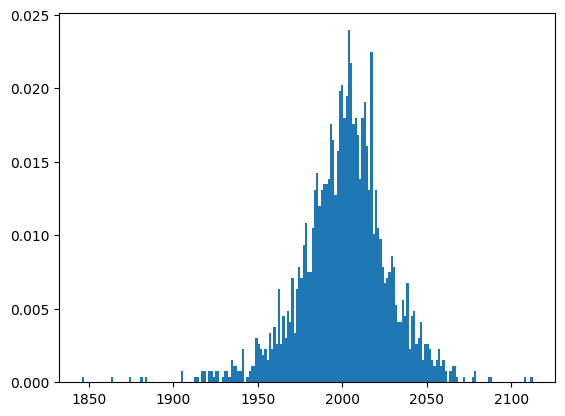

In [24]:
plt.hist((simulated_returns+1)*np.sum(investment_amounts), density=True, bins=200);

## Sweep over weights

In [11]:
weight_0 = np.linspace(0, 1, 20)
simulation_period_days = 5*252
investment_amounts = np.zeros(simulation_period_days)
for i in np.arange(21, simulation_period_days, 21):
    investment_amounts[i] = 200
investment_amounts[0] = 2000

simulated_returns_sweep = np.zeros((len(weight_0), 2))
for i, weight in enumerate(weight_0):
    weights = np.array([weight, 1 - weight])

    simulated_returns = run_monte_carlo_sim_portfolio(
        monte_carlo_repetitions=2000,
        ppfs=[vanguard_etf.daily_returns_histogram.ppf, ishares_etf.daily_returns_histogram.ppf],
        cov_matrix=cov_matrix,
        weights=weights,
        investment_amounts=investment_amounts,
        buy_fee=np.array([0,0]),
    )

    simulated_returns_sweep[i, :] = np.array([simulated_returns.mean(), simulated_returns.std()])
    
    

In [12]:
simulated_returns_sweep

array([[0.56455847, 0.39161092],
       [0.569423  , 0.38793154],
       [0.55339591, 0.36827542],
       [0.55870518, 0.36869155],
       [0.55874646, 0.36262321],
       [0.53202559, 0.34623008],
       [0.52524358, 0.33593609],
       [0.51582985, 0.32649494],
       [0.50715031, 0.33329458],
       [0.49924311, 0.32095709],
       [0.49162852, 0.32554473],
       [0.479161  , 0.32103107],
       [0.47408185, 0.31003019],
       [0.46165122, 0.31216853],
       [0.44265717, 0.31024284],
       [0.44382103, 0.33413487],
       [0.43537734, 0.33269633],
       [0.42420582, 0.34651445],
       [0.42135199, 0.35365942],
       [0.40339413, 0.36864931]])

Text(0, 0.5, 'mean return')

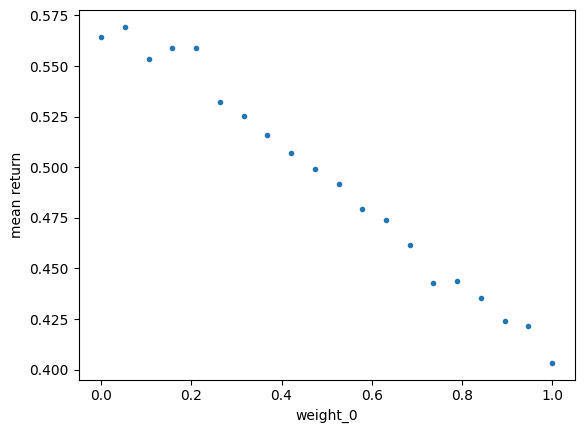

In [13]:
plt.plot(weight_0, simulated_returns_sweep[:,0], '.')
plt.xlabel("weight_0")
plt.ylabel("mean return")

Text(0, 0.5, 'std return')

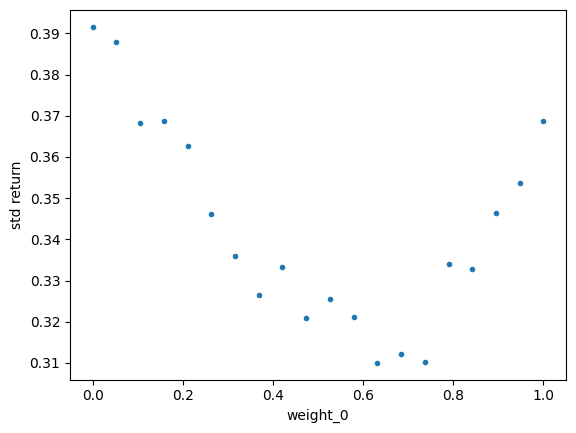

In [14]:
plt.plot(weight_0, simulated_returns_sweep[:,1], '.')
plt.xlabel("weight_0")
plt.ylabel("std return")

Text(0, 0.5, 'mean/std return')

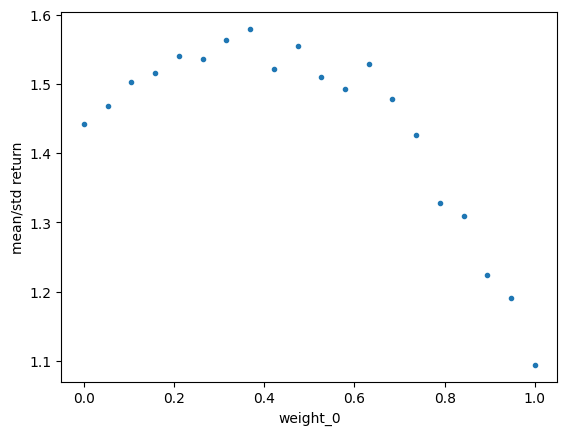

In [15]:
plt.plot(weight_0, simulated_returns_sweep[:,0]/ simulated_returns_sweep[:,1], '.')
plt.xlabel("weight_0")
plt.ylabel("mean/std return")

Text(0, 0.5, 'std return')

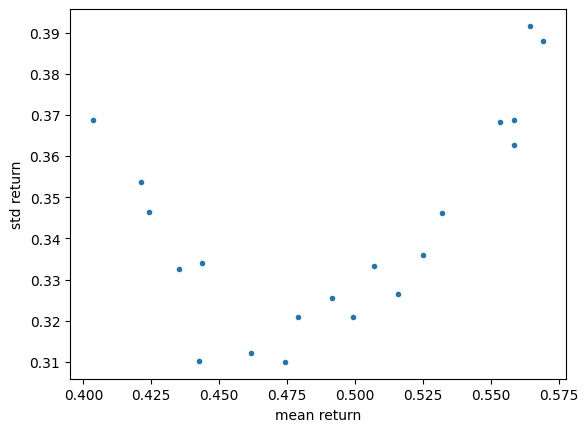

In [16]:
plt.plot(simulated_returns_sweep[:,0], simulated_returns_sweep[:,1], '.')
plt.xlabel("mean return")
plt.ylabel("std return")

## Time evolution

In [41]:
weights = np.array([0.75, 0.25])
simulation_period_days_sweep = np.linspace(1, 5*252, 10, dtype=int)

simulated_returns_days = np.zeros((len(simulation_period_days_sweep), 3))
for i, simulation_period_days in enumerate(simulation_period_days_sweep):
    investment_amounts = np.zeros(simulation_period_days)
    for j in np.arange(21, simulation_period_days, 21):
        investment_amounts[j] = 200
    investment_amounts[0] = 4000
    
    simulated_returns = run_monte_carlo_sim_portfolio(
        monte_carlo_repetitions=2000,
        ppfs=[vanguard_etf.daily_returns_histogram.ppf, ishares_etf.daily_returns_histogram.ppf],
        cov_matrix=cov_matrix,
        weights=weights,
        investment_amounts=investment_amounts,
        buy_fee=np.array([0,0]),
    )

    simulated_returns_days[i, :] = np.array([simulated_returns.mean(), simulated_returns.std(), np.sum(investment_amounts)])

In [42]:
simulated_returns_days

array([[0.00000000e+00, 0.00000000e+00, 4.00000000e+03],
       [6.26269927e-02, 1.02321087e-01, 5.20000000e+03],
       [1.16751912e-01, 1.44955947e-01, 6.60000000e+03],
       [1.67527488e-01, 1.80471174e-01, 7.80000000e+03],
       [2.17714920e-01, 2.05166296e-01, 9.20000000e+03],
       [2.79963259e-01, 2.37528530e-01, 1.06000000e+04],
       [3.25220234e-01, 2.68582097e-01, 1.18000000e+04],
       [3.85362582e-01, 2.99311943e-01, 1.32000000e+04],
       [4.40315254e-01, 3.29280145e-01, 1.46000000e+04],
       [5.16812410e-01, 3.67828382e-01, 1.58000000e+04]])

Text(0, 0.5, 'return')

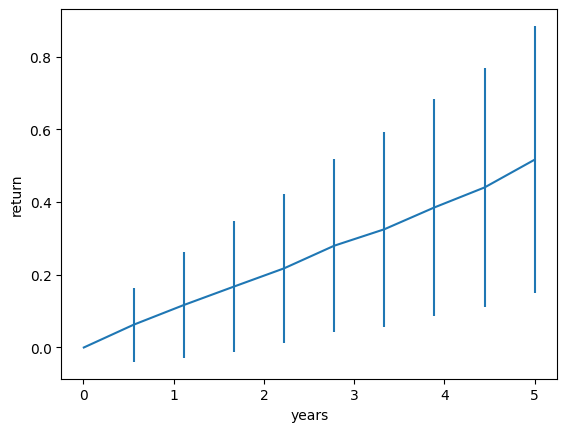

In [43]:
plt.errorbar(simulation_period_days_sweep/252, simulated_returns_days[:,0], yerr=simulated_returns_days[:,1])
plt.xlabel("years")
plt.ylabel("return")

Text(0, 0.5, 'net worth')

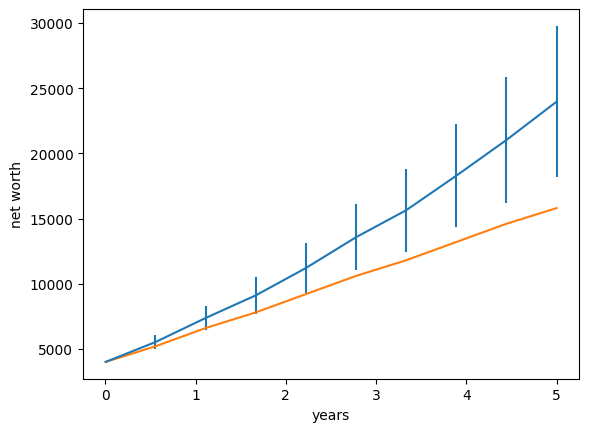

In [44]:
plt.errorbar(
    simulation_period_days_sweep/252,
    (simulated_returns_days[:,0]+1) * simulated_returns_days[:,2],
    yerr=simulated_returns_days[:,1] * simulated_returns_days[:,2],
)
plt.plot(simulation_period_days_sweep/252, simulated_returns_days[:,2])
plt.xlabel("years")
plt.ylabel("net worth")